In this notebook a simple model is applied in daytime images extracted from images in TTG_TUR folder.

Images were selected using notebook "01-moving_files.ipynb" and split in train, validation, and test images using notebook "02-baseline_model.ipynb".


# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import os

import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# Data pre-processing

* Read picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

For these pre-processing we used the class `ImageDataGenerator` that is part of the Keras image processing helper tools, located at `keras.preprocessing.image`. `ImageDataGenerator` allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. 

In [2]:
base_dir = "../data/TTG_TUR/"

train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')



from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled to 1./255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    # target directory
                    train_dir,
                    # All images will be resized to 128 x 128 (a somewhat arbitrary choice)
                    target_size = (128,128),
                    batch_size = 20,
                    # Since we use binary cross entropy we need binary labels
                    class_mode = 'binary',shuffle=False)

validation_generator = test_datagen.flow_from_directory(
                    # target directory
                    validation_dir,
                    # All images will be resized to 128 x 128 (a somewhat arbitrary choice)
                    target_size = (128,128),
                    batch_size = 20,
                    # Since we use binary cross entropy we need binary labels
                    class_mode = 'binary',shuffle=False)

test_generator = test_datagen.flow_from_directory(
                    # target directory
                    test_dir,
                    # All images will be resized to 128 x 128 (a somewhat arbitrary choice)
                    target_size = (128,128),
                    batch_size = 20,
                    # Since we use binary cross entropy we need binary labels
                    class_mode = 'binary',shuffle=False)


Found 5061 images belonging to 2 classes.
Found 632 images belonging to 2 classes.
Found 632 images belonging to 2 classes.


In [3]:
nb_validation_samples = validation_generator.samples
batch_size = validation_generator.batch_size

print(nb_validation_samples)
print(batch_size)


632
20


In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    input_shape = (data_batch.shape[1],data_batch.shape[2],data_batch.shape[3])
    print(input_shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 128, 128, 3)
(128, 128, 3)
labels batch shape: (20,)


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('data batch',data_batch)
    print('labels batch shape:', labels_batch.shape)
    print('labels_batch', labels_batch)
    break

data batch shape: (20, 128, 128, 3)
data batch [[[[0.654902   0.68235296 0.7137255 ]
   [0.61960787 0.64705884 0.6784314 ]
   [0.6156863  0.6431373  0.6745098 ]
   ...
   [0.654902   0.6862745  0.69803923]
   [0.64705884 0.6784314  0.6901961 ]
   [0.65882355 0.6901961  0.7019608 ]]

  [[0.6313726  0.65882355 0.6901961 ]
   [0.6117647  0.6392157  0.67058825]
   [0.61960787 0.64705884 0.6784314 ]
   ...
   [0.6313726  0.6627451  0.6745098 ]
   [0.64705884 0.6784314  0.6901961 ]
   [0.6666667  0.69803923 0.70980394]]

  [[0.64705884 0.6745098  0.7058824 ]
   [0.62352943 0.6509804  0.68235296]
   [0.61960787 0.64705884 0.6784314 ]
   ...
   [0.6509804  0.6901961  0.69803923]
   [0.6627451  0.7019608  0.70980394]
   [0.6509804  0.6901961  0.69803923]]

  ...

  [[0.10980393 0.10196079 0.10588236]
   [0.03137255 0.01176471 0.        ]
   [0.05882353 0.01176471 0.01176471]
   ...
   [0.49411768 0.50980395 0.5137255 ]
   [0.10980393 0.12941177 0.14117648]
   [0.6862745  0.7019608  0.69803923]]

# The baseline model

## Specifying architecture

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

## Compile 

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

## Fitting the model

Let's fit our model to the data using the generator (train_generator, validation_generator). We do it using the `fit_generator` method, the equivalent of `fit` for data generators like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 

Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [9]:
import datetime

# print(datetime.datetime.now())
t1 = datetime.datetime.now()
print(t1)

2019-12-14 17:13:48.487600


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 92s 918ms/step - loss: 0.6313 - acc: 0.6951 - val_loss: 0.3161 - val_acc: 0.8488
Epoch 2/30
100/100 [==============================] - 94s 939ms/step - loss: 0.5261 - acc: 0.7900 - val_loss: 0.2309 - val_acc: 0.6951
Epoch 3/30
100/100 [==============================] - 96s 963ms/step - loss: 0.6121 - acc: 0.7085 - val_loss: 0.3682 - val_acc: 0.8488
Epoch 4/30
100/100 [==============================] - 94s 937ms/step - loss: 0.5061 - acc: 0.7976 - val_loss: 0.1268 - val_acc: 0.6951
Epoch 5/30
100/100 [==============================] - 92s 925ms/step - loss: 0.5028 - acc: 0.8085 - val_loss: 1.7678 - val_acc: 0.8105
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5566 - acc: 0.7600 - val_loss: 0.1646 - val_acc: 0.7337
Epoch 7/30
100/100 [==============================] - 90s 900ms/step - loss: 0.5757 - acc: 0.7557 - val_loss: 1.1616 - val_acc: 0.7298
Epoch 8/30
100/100 [==============================] - 89s

## Save model

In [11]:
model.save("../models/baseline_model_omdena_v011119.h5")

## Model Evaluation

### Learning curves

In [12]:
def smooth_curve(points, factor=0.8):
    """ Make curves smoother"""
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Making curves smoother for visualization.

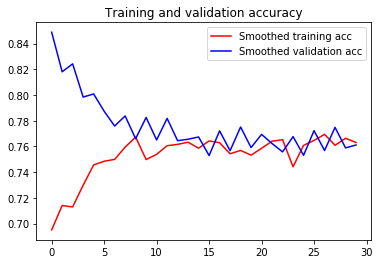

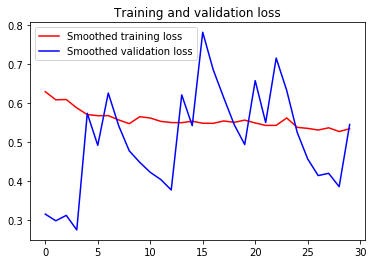

In [14]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
#create a dataframe to save the result as .csv

df = pd.DataFrame(history.history)

df.to_csv("../history/baseline_model_omdena_history_v011119.csv", index = False)

In [16]:
t2 = datetime.datetime.now()
(print(t2))
print(t2-t1)

2019-12-14 18:00:01.897488
0:46:13.409888


In [17]:
df_test = pd.read_csv("../models/baseline_model_omdena_history_v011119.csv")
df_test.head()

,val_loss,val_acc,loss,acc
0,0.306190,0.848790,0.612072,0.750000
1,0.144471,0.695122,0.578078,0.755679
2,0.172904,0.848790,0.550367,0.780000
3,0.191076,0.695122,0.573492,0.788500
4,1.115146,0.810484,0.614423,0.737002


# Trying to improve performance by considering that the data is imbalanced

The model will include class_weights to try to have the data more in balance and see what is the effect on the performance.

## Testing some suggestions on how to define the class_weights

In [18]:
# ref: https://github.com/keras-team/keras/issues/1875

from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: float(majority/count) for cls, count in counter.items()}

In [19]:
class_weights = get_class_weights(train_generator.classes)
class_weights

{0: 1.0, 1: 3.203488372093023}

In [20]:
len(train_generator.classes)

5061

In [21]:
# Repeat fitting using class_weight

history_2 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      class_weight = class_weights)


Epoch 1/30
100/100 [==============================] - 92s 918ms/step - loss: 0.9668 - acc: 0.7830 - val_loss: 0.3580 - val_acc: 0.8498
Epoch 2/30
100/100 [==============================] - 89s 890ms/step - loss: 1.0820 - acc: 0.6720 - val_loss: 0.5623 - val_acc: 0.7124
Epoch 3/30
100/100 [==============================] - 87s 867ms/step - loss: 1.0612 - acc: 0.6172 - val_loss: 0.4697 - val_acc: 0.8065
Epoch 4/30
100/100 [==============================] - 88s 880ms/step - loss: 1.0106 - acc: 0.6875 - val_loss: 0.5273 - val_acc: 0.6778
Epoch 5/30
100/100 [==============================] - 87s 875ms/step - loss: 1.0854 - acc: 0.6205 - val_loss: 0.5784 - val_acc: 0.5192
Epoch 6/30
100/100 [==============================] - 91s 911ms/step - loss: 1.0496 - acc: 0.5895 - val_loss: 0.4410 - val_acc: 0.6911
Epoch 7/30
100/100 [==============================] - 87s 873ms/step - loss: 0.9658 - acc: 0.7123 - val_loss: 0.7461 - val_acc: 0.7258
Epoch 8/30
100/100 [==============================] - 8

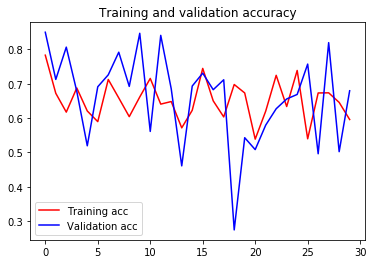

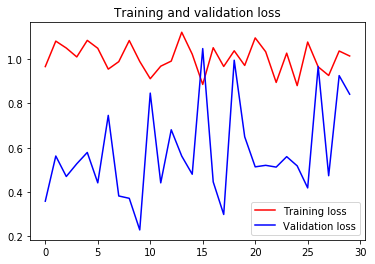

In [22]:
import matplotlib.pyplot as plt

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# create a dataframe to save the result as .csv

df = pd.DataFrame(history_2.history)

df.to_csv("../models/baseline_model_omdena_history_using_weights_v011119.csv", index = False)

In [24]:
t3 = datetime.datetime.now()
(print(t3))
print(t3-t2)

2019-12-14 18:45:24.643901
0:45:22.746413


## Testing using class_weight from sklearn-utils

In [25]:
# or using sklearn (https://ipfs-sec.stackexchange.cloudflare-ipfs.com/datascience/A/question/13490.html)

from sklearn.utils import class_weight

y_train = train_generator.classes

class_weights2 = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights2
class_weight_dict = dict(enumerate(class_weights2))
class_weight_dict



{0: 0.6560798548094374, 1: 2.1017441860465116}

In [26]:
# Repeat fitting using class_weight

history_3 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      class_weight = class_weight_dict)

Epoch 1/30
100/100 [==============================] - 92s 920ms/step - loss: 0.6793 - acc: 0.6435 - val_loss: 0.8419 - val_acc: 0.2812
Epoch 2/30
100/100 [==============================] - 88s 882ms/step - loss: 0.5279 - acc: 0.7764 - val_loss: 0.4386 - val_acc: 0.7134
Epoch 3/30
100/100 [==============================] - 89s 892ms/step - loss: 0.7361 - acc: 0.5295 - val_loss: 0.4274 - val_acc: 0.7692
Epoch 4/30
100/100 [==============================] - 89s 890ms/step - loss: 0.6324 - acc: 0.6482 - val_loss: 0.2373 - val_acc: 0.6931
Epoch 5/30
100/100 [==============================] - 99s 990ms/step - loss: 0.5695 - acc: 0.7120 - val_loss: 1.2588 - val_acc: 0.8095
Epoch 6/30
100/100 [==============================] - 92s 917ms/step - loss: 0.6771 - acc: 0.6325 - val_loss: 0.2438 - val_acc: 0.7348
Epoch 7/30
100/100 [==============================] - 89s 888ms/step - loss: 0.5689 - acc: 0.7395 - val_loss: 0.6949 - val_acc: 0.7419
Epoch 8/30
100/100 [==============================] - 9

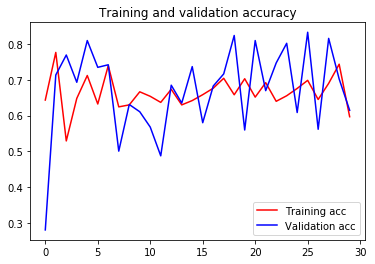

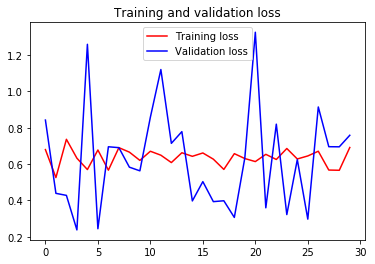

In [27]:
import matplotlib.pyplot as plt

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# create a dataframe to save the result as .csv

df = pd.DataFrame(history_3.history)

df.to_csv("../history/baseline_model_omdena_history_using_weights_sklearn_v01119.csv", index = False)

In [29]:
t4 = datetime.datetime.now()
(print(t4))
print(t4-t3)

2019-12-14 19:30:45.124845
0:45:20.480944


It seems that using the class_weight from sklearn.utils has a positive effect. However, it is clear that there is overfitting. Let's use from now on a implementation with and one without class_weight (using sklearn class_weight) to compare. Let's check also what happens when class_weight = 'auto' is used.

## Testing using class_weight = 'auto'

In [30]:
# Repeat fitting using class_weight

history_4 = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      class_weight = 'auto')


Epoch 1/30
100/100 [==============================] - 95s 948ms/step - loss: 0.4846 - acc: 0.7845 - val_loss: 0.1088 - val_acc: 0.8558
Epoch 2/30
100/100 [==============================] - 92s 923ms/step - loss: 0.5244 - acc: 0.7602 - val_loss: 0.1823 - val_acc: 0.7063
Epoch 3/30
100/100 [==============================] - 91s 908ms/step - loss: 0.4669 - acc: 0.7930 - val_loss: 0.1969 - val_acc: 0.8679
Epoch 4/30
100/100 [==============================] - 90s 897ms/step - loss: 0.4884 - acc: 0.7910 - val_loss: 0.0855 - val_acc: 0.6982
Epoch 5/30
100/100 [==============================] - 88s 881ms/step - loss: 0.5500 - acc: 0.7562 - val_loss: 1.7277 - val_acc: 0.8145
Epoch 6/30
100/100 [==============================] - 91s 909ms/step - loss: 0.5229 - acc: 0.7567 - val_loss: 0.2225 - val_acc: 0.7815
Epoch 7/30
100/100 [==============================] - 89s 891ms/step - loss: 0.4250 - acc: 0.8105 - val_loss: 1.0101 - val_acc: 0.7702
Epoch 8/30
100/100 [==============================] - 9

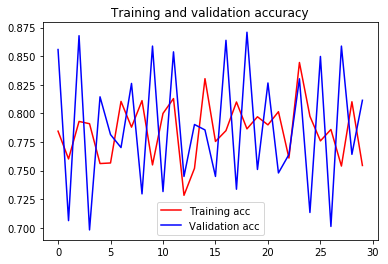

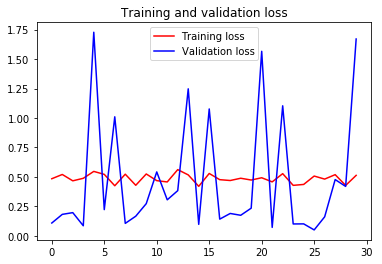

In [31]:
import matplotlib.pyplot as plt

acc = history_4.history['acc']
val_acc = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
# create a dataframe to save the result as .csv

df = pd.DataFrame(history_4.history)

df.to_csv("../history/baseline_model_omdena_history_using_class_weight_auto_v011119.csv", index = False)

In [33]:
t5 = datetime.datetime.now()
(print(t5))
print(t5-t4)

2019-12-14 20:15:43.986991
0:44:58.862146
